# **Regresión Logística**
***Integrantes***
* Jasmín Correa
* Javier Martinez
* Marnol Sanchez
* Oscar Polma
* Ariel Valenzuela

## **Conjunto de datos de Diabetes**

##**Introducción**

La realización de este proyecto tiene el fin de predecir resultados acerca de la positividad o negatividad de diabetes en las personas, para llevar esto a cabo se utilizó una base de datos que contenía información de 768 individuos de los cuales se tenía información sobre la cantidad de embarazos que han tenido, la concentración plasmática de glucosa luego de 2 horas de la prueba oral de tolerancia a la glucosa, su presión arterial diastólica, el grosor del pliegue cutáneo del tríceps, el nivel de insulina sérica a las 2 horas, el índice de masa corporal, la probabilidad de tener diabetes según la historia familiar y la edad del individuo. De esta información se analizaron y seleccionaron algunas de las variables que fueron consideradas óptimas para lo que buscamos con este proyecto, que es una certera predicción sobre la posibilidad de tener o no diabetes, estas variables seleccionadas serán mencionadas más adelante.
Para determinar estas predicciones se utilizará el modelo de regresión logística, el cual tiene como objetivo estudiar la probabilidad de que ocurra un evento específico en función de una serie de variables que consideramos relevantes. Se utilizará esta regresión ya que nos dará resultados probabilísticos acotados a valores entre 0 y 1 asintóticos, por lo tanto, si determinamos un umbral o punto de operación cualquiera entre 0 y 1, podemos definir que, si un valor arrojado por el modelo de regresión logística está bajo este punto de operación tomará el valor 0, y en el caso contrario si el valor arrojado está por sobre el punto de operación el valor que tomará será 1.
Los resultados que obtuvimos fueron que con el punto de operación 0.5 se obtenían resultados más equilibrados lo que permite tomar decisiones más correctas y con menos consecuencias para las personas que necesitan saber su diagnóstico sobre la diabetes, esto se fundamenta en los códigos de el reporte de clasificación y en la matriz de confusión.


En este proyecto se generará una *regresion logistica* para predecir si una persona tiene diabetes o no, basandose en un conjunto de datos que contiene las siguientes variables:

* "**preg**" : Numero de veces que la persona estuvo embarazada.
* "**plas**" :  Concentracion de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
* "**press**" : Presión arterial diastólica (mm Hg)
* "**skin**" :  Grosor del pliegue cutáneo del triceps (mm)
* "**insu**" : Insulina sérica a las 2 horas (mu U/ml)
* "**mass**" : Indice de masa corporal (masa / (altura)^2)
* "**age**" : Edad
* "**class**" : 0 indica que no fue diagnoticado con diabetes, 1 indica que fue diagnosticado con diabetes



# ***Sección 1***

## *Importacion de Librerías*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## *Importación de Data*

In [3]:
data = pd.read_csv("/content/drive/MyDrive/mineria de datos/TRABAJO 2 MINERIA DE DATOS /Diabetes.csv")

In [4]:
# puede usarse para evitar el uso del google drive, ya que el dataset se subio a github
#url = ("https://raw.githubusercontent.com/oscarpolma/Mineria-de-datos/main/Diabetes.csv")
#data = pd.read_csv(url);data

In [5]:
data["class"].value_counts()

class
tested_negative    500
tested_positive    268
Name: count, dtype: int64

El conteo indica que de la base de datos, 268 personas fueron diagnosticadas que tienen diabetes, y 500 fueron diagnosticas que no tienen diabetes

# ***Sección 2***

## *Exploratory Data Analysis (EDA)*

### **Informacion y estadistica descriptiva**

Informacion acerca de las Variables

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


Resumen Estadistica Descriptiva de las Variables

In [7]:
data.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### **Revisión de Datos Faltantes**

Sumatoria de datos nulos por cada variable

In [8]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

No hay existencia de datos nulos dentro de nuestra base de datos (incluimos mapa de calor para corrobar esto.)

Text(74.44444444444444, 0.5, 'Indice de fila')

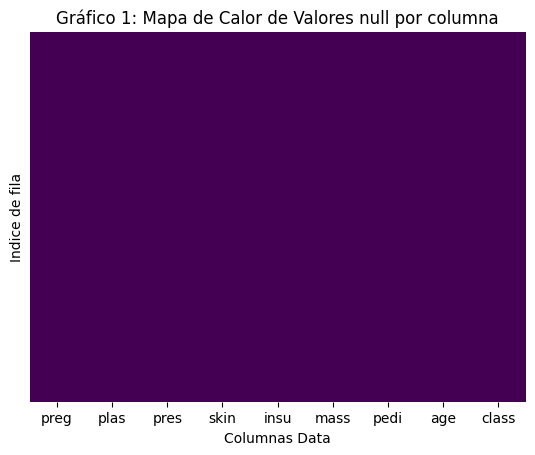

In [9]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title("Gráfico 1: Mapa de Calor de Valores null por columna")
plt.xlabel('Columnas Data')
plt.ylabel('Indice de fila')

Lo que se quiere explicar en este grafico es la suma de datos nulos en cada una de las variables, como se puede observar, en ninguna variable existen datos nulos, pues si existiesen se podría visualizar en el gráfico una línea de un color diferente, que indicaría la presencia de un valor nulo.

### **Revisión de Datos Invalidos (datos con valor 'cero')**

Dado que el analisis descriptivo, descubrimos que ciertas variables comienzan desde el valor **'cero'**, esto es valido solo en una variable, **'preg'**, ya que la persona evaluada pudo no estar nunca embarazada.
Pero otras variables como **plas**, **pres**, **skin**, **insu** y **mass**, dado lo que representan estas variables es invalido que esto pueda tener valores con **'cero'**

Por lo que analizaremos esto:

In [10]:
(data == 0).sum()

preg     111
plas       5
pres      35
skin     227
insu     374
mass      11
pedi       0
age        0
class      0
dtype: int64

Text(74.44444444444444, 0.5, 'Indice de fila')

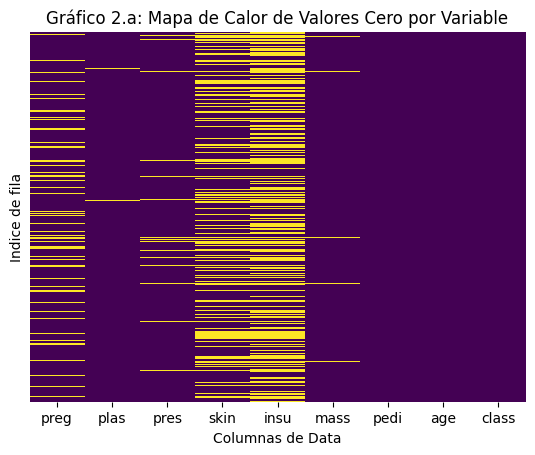

In [11]:
sns.heatmap((data == 0), yticklabels = False, cbar = False, cmap = "viridis")
plt.title("Gráfico 2.a: Mapa de Calor de Valores Cero por Variable")
plt.xlabel('Columnas de Data')
plt.ylabel('Indice de fila')

El objetivo de este gráfico es visualizar la cantidad de datos con valor 0 de cada una de las variables de la base de datos. Lo concluido al visualizar el gráfico es que en la variable preg es comprensible que existan datos 0, pues indica que la persona asociada a ese valor 0 nunca ha estado embarazada, sin embargo en las variables plas, pres, skin, insu y mass no es lógico que presenten valores 0 por temas biológicos. Además se pude observar que la variable con mas datos 0 es insu, seguida por skin, luego preg, después pres, luego mass y finalmente plas, sin considerar las variables pedí, age y class que no tienen valores 0.

Graficamos mediante grafico de barras para visualizar las variables con mas datos faltantes

Text(0, 0.5, 'Cantidad')

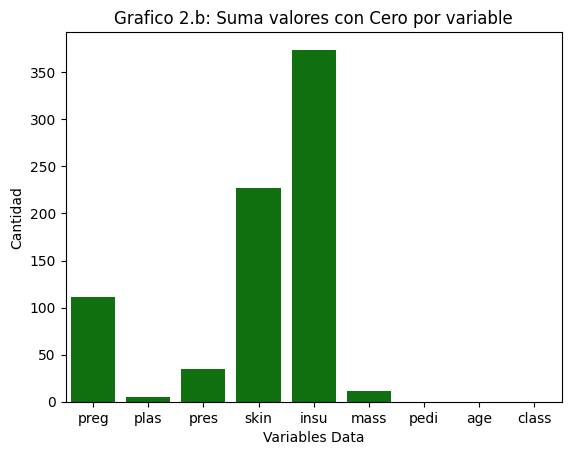

In [12]:
sns.barplot(x = (data == 0).sum().index, y = (data == 0).sum(), color = "green")
plt.title("Grafico 2.b: Suma valores con Cero por variable")
plt.xlabel("Variables Data")
plt.ylabel("Cantidad")

In [13]:
print("proporcion datos con valores cero por variable:")
print(f"preg: {(111 / 768) * 100:.1f}%")
print(f"plas: {(5 / 768) * 100:.1f}%")
print(f"pres: {(35 / 768) * 100:.1f}%")
print(f"skin: {(227 / 768) * 100:.1f}%")
print(f"insu: {(374 / 768) * 100:.1f}%")
print(f"mass: {(11 / 768) * 100:.1f}%")

proporcion datos con valores cero por variable:
preg: 14.5%
plas: 0.7%
pres: 4.6%
skin: 29.6%
insu: 48.7%
mass: 1.4%


Hay aproximadamente, un 15% de datos con valor cero en la variable '**preg**', un 5% de datos con valor cero en la variable '**pres**', un 30% de datos con valor cero en la variable '**skin**', y casi un 50% de datos con valor cero en la variable '**insu**'. Las variables 'plas' y 'mass' no superan mas del 2%, por lo que en estas variables se puede llegar a la decision de borrar sus respectivas filas de datos para no sesgar el modelo final. En el caso de las variables con mas proporcion de datos invalidos, se puede reemplazar por la media y moda, pero al ser muchos datos estos pueden sesgar el resultado final.

Como fue mencionado, hay valores cero de una sola variable que son validos. Dado que en esta seccion es sobre **ETA**, esta informacion nos servirá para la preparacion de datos para el modelado.

### **Graficos**

#### **Graficos con dataset original**

Text(0, 0.5, 'Cuenta')

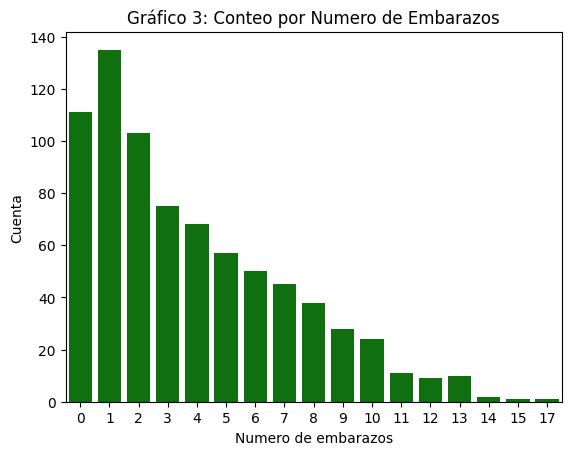

In [14]:
sns.countplot(x = 'preg', data = data, color = 'green')
plt.title('Gráfico 3: Conteo por Numero de Embarazos')
plt.xlabel('Numero de embarazos')
plt.ylabel('Cuenta')

En este gráfico se puede observar la suma de personas según la cantidad de veces que han estado embarazadas, siendo un embarazo el que tiene mayor frecuencia, seguido por ningún embarazo y finalmente las personas que han estado embarazadas 2 veces es el tercer dato más repetido.

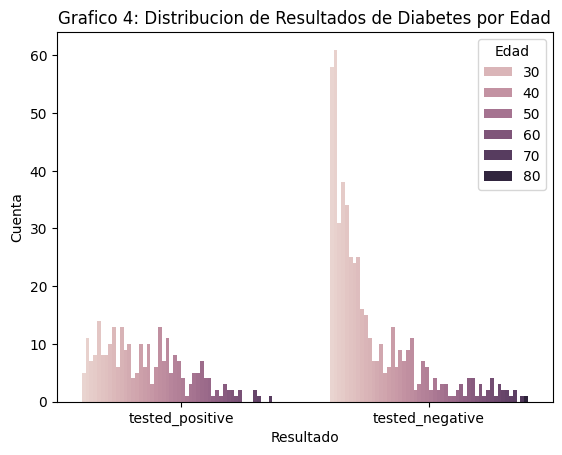

In [15]:
sns.countplot(data, x = 'class', hue = 'age', legend = True)
plt.title("Grafico 4: Distribucion de Resultados de Diabetes por Edad")
plt.ylabel("Cuenta")
plt.xlabel("Resultado")
plt.legend(title="Edad")

Este gráfico muestra el resultado positivo y el resultado negativo agrupados según la edad del individuo. Se puede concluir que las personas de entre 21 y 30 son los que más obtienen resultados negativos en cuanto a la diabetes, al mismo tiempo se puede visualizar que las personas que mas reciben resultados positivos son los que están en un rango de edad entre 21 y 30 años y los que están entre 40 y 50 años.

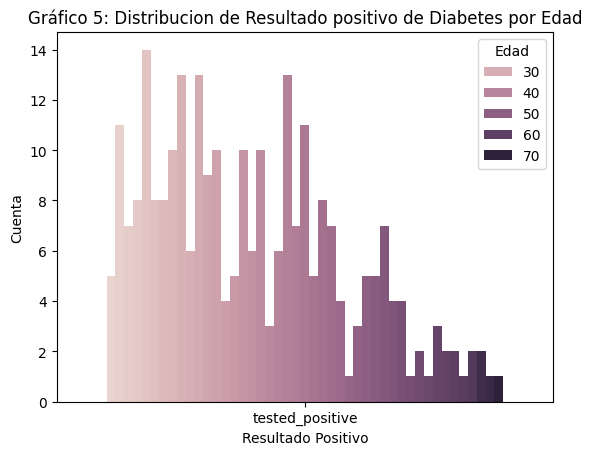

In [16]:
sns.countplot(data[data["class"] == 'tested_positive'], x="class", hue = "age", legend = True)
plt.title("Gráfico 5: Distribucion de Resultado positivo de Diabetes por Edad")
plt.ylabel("Cuenta")
plt.xlabel("Resultado Positivo")
plt.legend(title="Edad")

En este gráfico se pude visualizar con más detalle la positividad de la diabetes según la distribución de edad. Como mencionamos anteriormente, las personas que más reciben resultados positivos son los que están en un rango de edad entre 21 y 30 años y los que están entre 40 y 50 años.

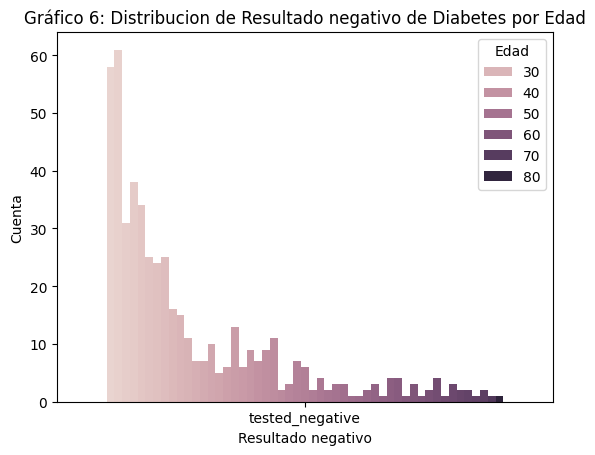

In [17]:
sns.countplot(data[data["class"] == 'tested_negative'], x="class", hue = "age", legend = True)
plt.title("Gráfico 6: Distribucion de Resultado negativo de Diabetes por Edad")
plt.ylabel("Cuenta")
plt.xlabel("Resultado negativo")
plt.legend(title="Edad")

En este gráfico se pude visualizar con más detalle la negatividad de la diabetes según la distribución de edad. Como mencionamos anteriormente, las personas de entre 21 y 30 son los que más obtienen resultados negativos, además se observa una inclinación hacia la derecha, lo que indica que mientras más avanza la edad disminuye la cantidad de personas con resultados negativos.

El siguiente grafico representa la dispersion de datos cruzada con las diferentes variables del dataset original.

Text(0.5, 1.02, 'Gráfico 7: Análisis de Pares del Conjunto de Datos de Diabetes')

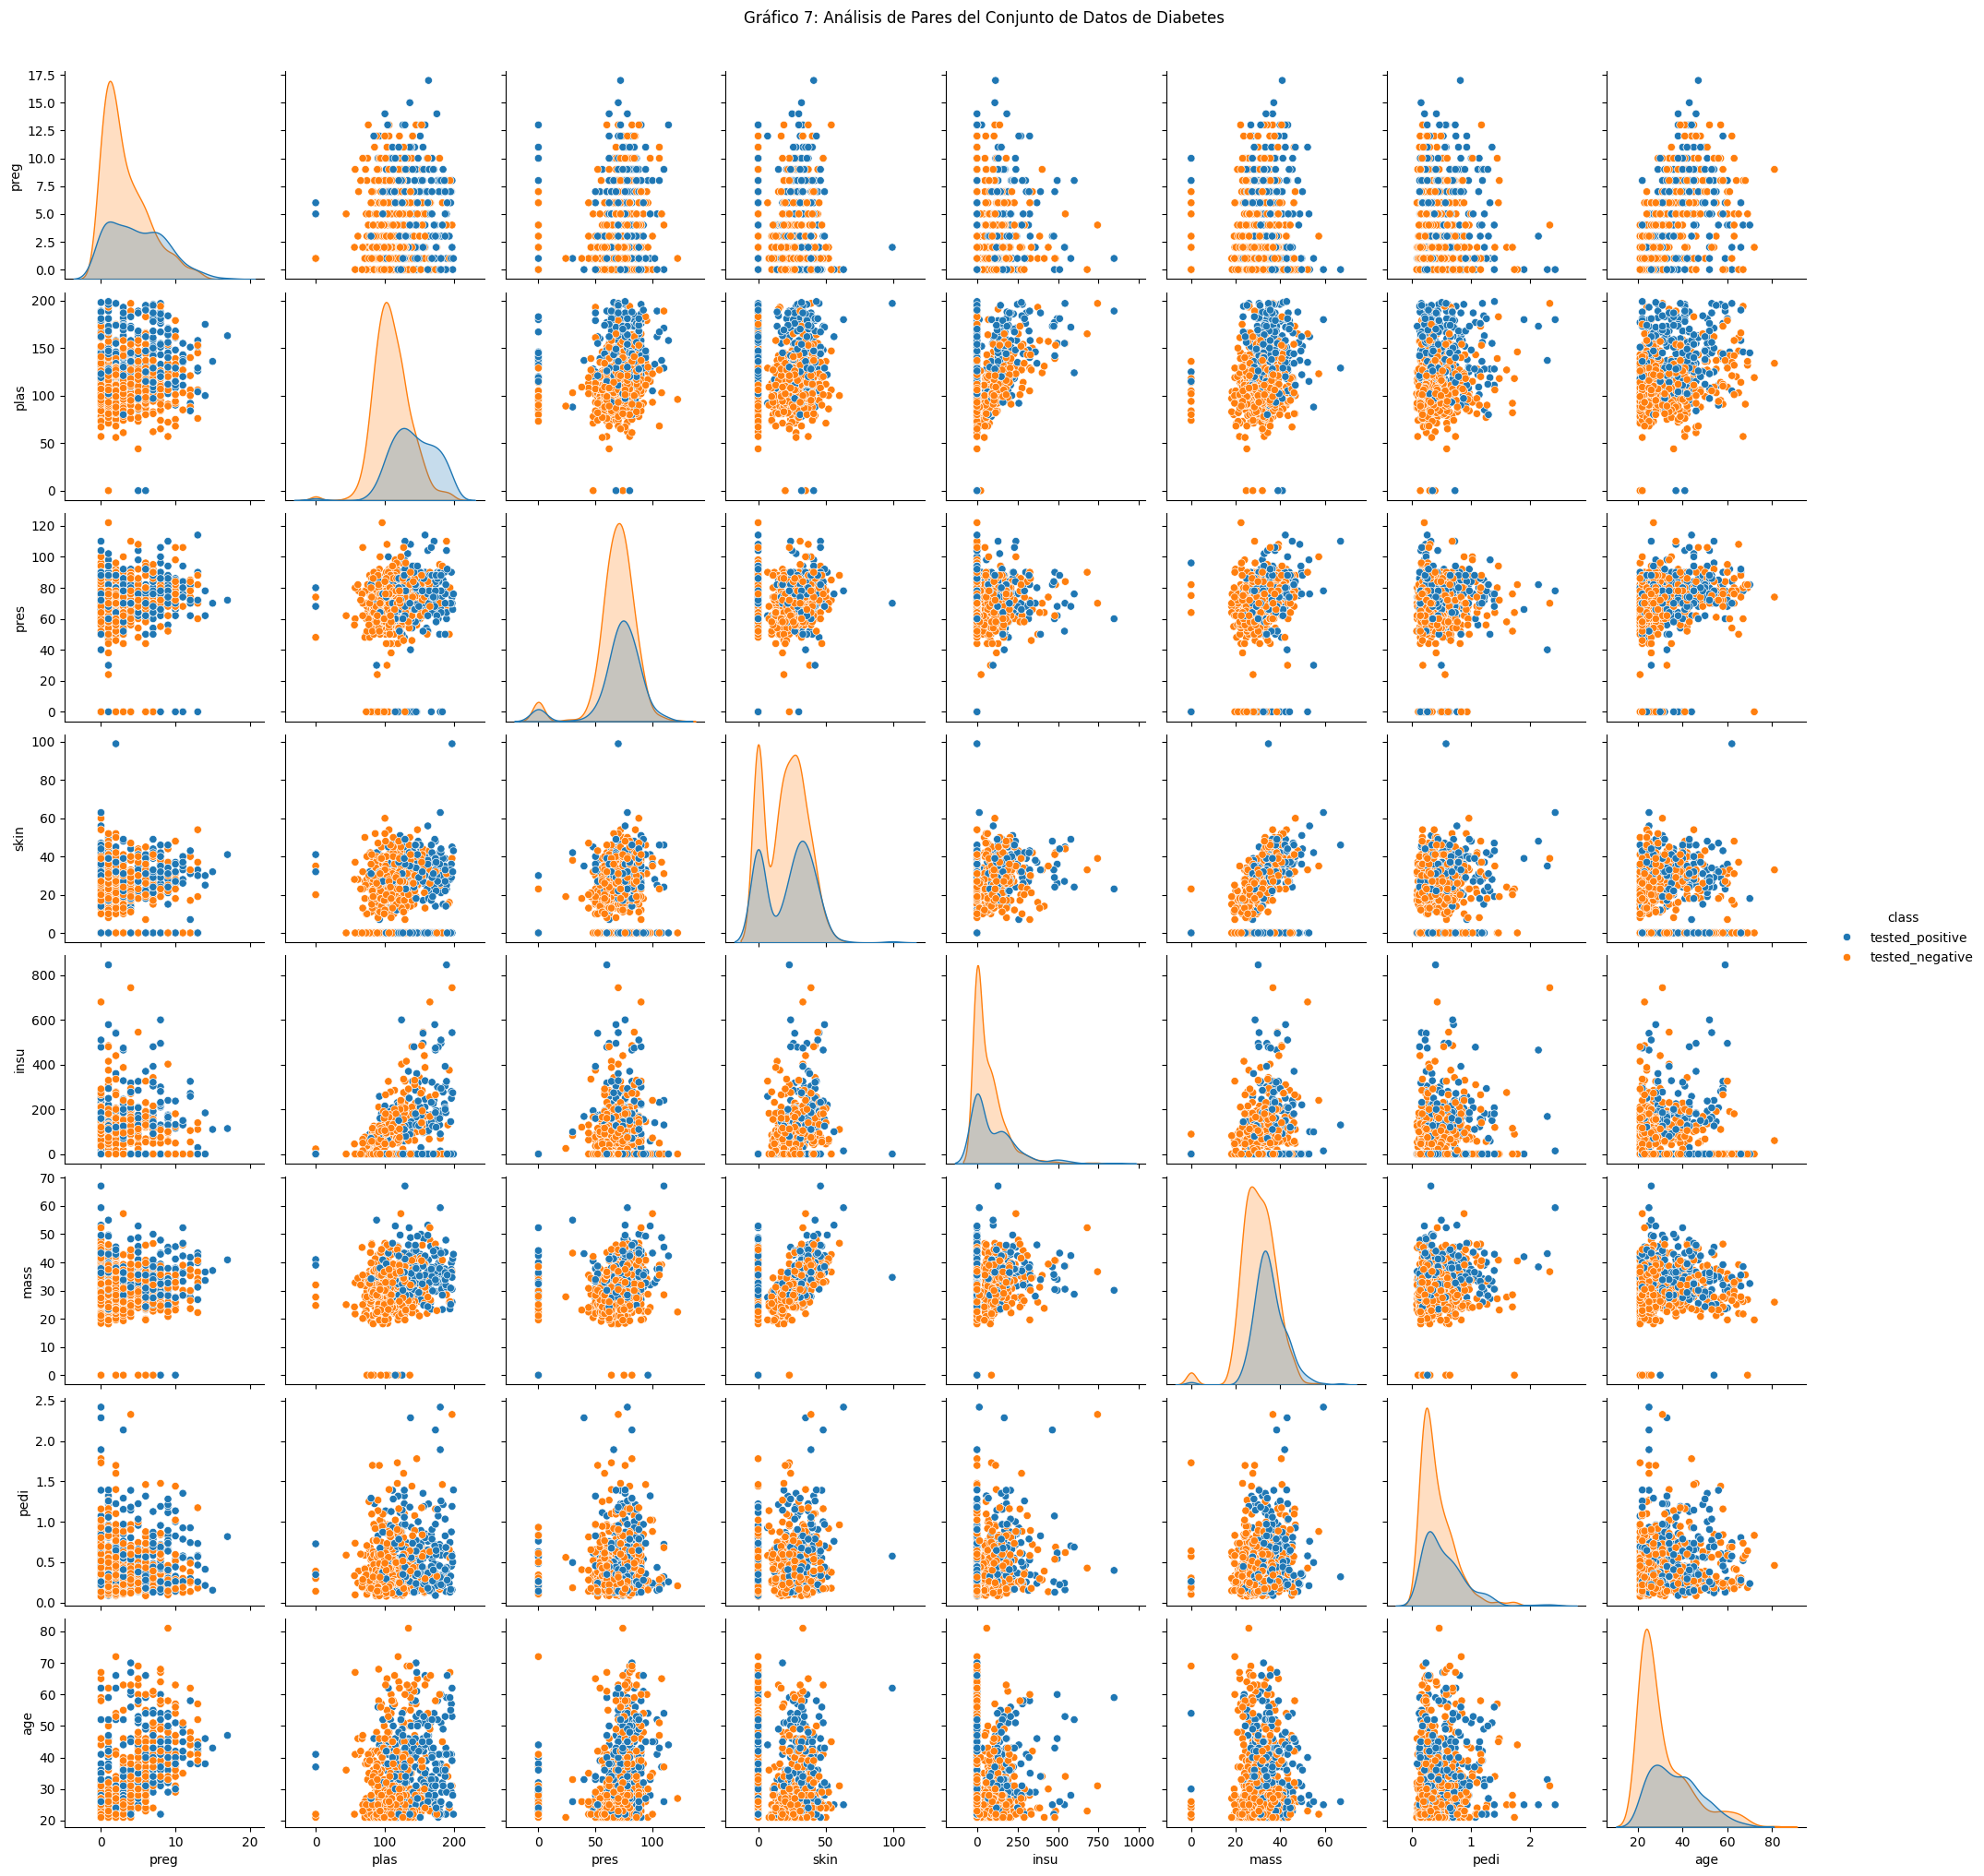

In [18]:
sns.pairplot(data, hue = "class")
plt.suptitle("Gráfico 7: Análisis de Pares del Conjunto de Datos de Diabetes", y=1.02)

En este conjunto de gráficos se busca principalmente identificar cierta correlación entre las variables, sin embargo no se logra identificar una correlación fuerte en ninguna de las variables, no obstante más adelante se realizarán distintos métodos para encontrar correlación entre variables, además en estos gráficos se puede observar la existencia de los datos con valor 0 y cuan alejados están estos de la media de la distribución, finalmente se puede mencionar que en estas visualizaciones se puede identificar fácilmente datos atípicos que podrían sesgar o dificultar la precisión del modelo.

#### **Graficos con data set sin ceros**

crearemos un data extra, en la cual no se incluya los valores 0, de las variables que no pueden contener este valor, pero esto es netamente hecho para la elaboracion de graficos, ya que dado que en ciertas variables hay muchos datos con 0, no se representa bien los datos graficamente


In [19]:
data_sin_ceros = data.drop(index = data[(data[['plas', 'pres', 'skin', 'insu', 'mass']] == 0).any(axis = 1)].index);data_sin_ceros

,preg,plas,pres,skin,insu,mass,pedi,age,class
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
6,3,78,50,32,88,31.0,0.248,26,tested_positive
8,2,197,70,45,543,30.5,0.158,53,tested_positive
13,1,189,60,23,846,30.1,0.398,59,tested_positive
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,tested_positive
755,1,128,88,39,110,36.5,1.057,37,tested_positive
760,2,88,58,26,16,28.4,0.766,22,tested_negative
763,10,101,76,48,180,32.9,0.171,63,tested_negative


Esta data es netamente extra para representacion grafica de ciertas variables

Text(0.5, 36.72222222222221, 'IMC')

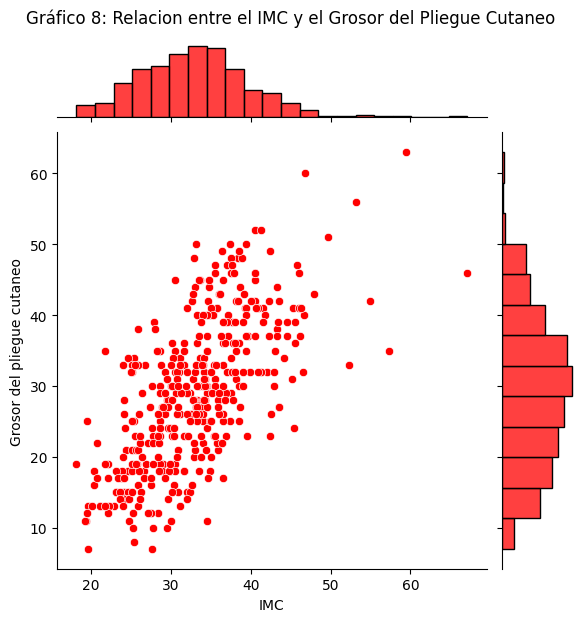

In [20]:
sns.jointplot(x = 'mass', y = 'skin', data=data_sin_ceros, color = 'red')
plt.suptitle("Gráfico 8: Relacion entre el IMC y el Grosor del Pliegue Cutaneo", y = 1.03)
plt.ylabel("Grosor del pliegue cutaneo")
plt.xlabel("IMC")

Primeramente, y como se mencionó, este gráfico no toma en cuenta los valores 0.
Se puede visualizar que entre las variables mencionadas existe una notable correlación, por lo que más adelante se determinará eliminar alguna de estas dos variables para evitar sesgos en los resultados.


Text(0, 0.5, 'cantidad')

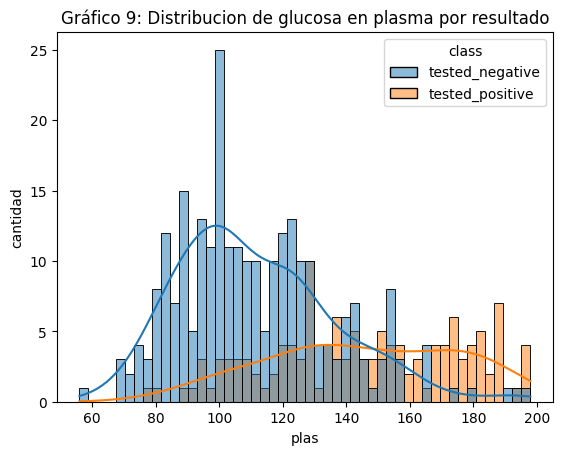

In [21]:
sns.histplot(data_sin_ceros, x = "plas" , hue="class",  bins = 50 , kde=True)
plt.title('Gráfico 9: Distribucion de glucosa en plasma por resultado')
plt.xlabel('plas')
plt.ylabel('cantidad')

En este gráfico se puede concluir que a mayor nivel de glucosa en la sangre aumentan las cantidades de testeos positivos, además los niveles de glucosa normales en el cuerpo, que van del 80 al 120, son donde más se agrupan resultados negativos de diabetes, a su vez, en los niveles del 130 a 200 es donde mas se observan testeos positivos.Por lo que se considera que esta variable es de importancia para determinar la diabetes en una persona.

Text(0, 0.5, 'cantidad')

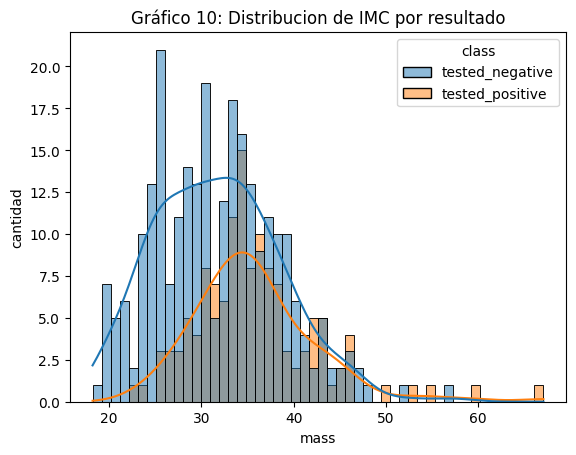

In [22]:
sns.histplot(data_sin_ceros, x = "mass" , hue="class",  bins = 50 , kde=True)
plt.title('Gráfico 10: Distribucion de IMC por resultado')
plt.xlabel('mass')
plt.ylabel('cantidad')

En este gráfico se puede visualizar la relación entre el IMC y los resultados de la diabetes, donde se concluye que las personas que tienen un IMC normal son las que más tienen resultados negativos, no así las personas que, según su IMC, tienen sobrepeso u obesidad, pues estas son las que mayor resultado positivo presentan. Por lo que se considerará el IMC (mass) como una variable determinante a la hora de predecir la diabetes.

# ***Sección 3***

## *Preparación de los datos*

### **Conversion de Variable Categorica (class) a Numerica**

In [23]:
Class = pd.get_dummies(data['class'], drop_first = True)
Class = Class.astype(int)

In [24]:
data_1 = pd.concat([data, Class], axis = 1)

In [25]:
data_1 = data_1.drop('class', axis = 1);data_1

,preg,plas,pres,skin,insu,mass,pedi,age,tested_positive
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### **Selección de variables a utilizar**

utilizamos un mapa de caja, para analizar la dispersion de los datos de cada variable


Text(0.5, 1.0, 'Gráfico 11: Grafico de caja de variables del Dataset')

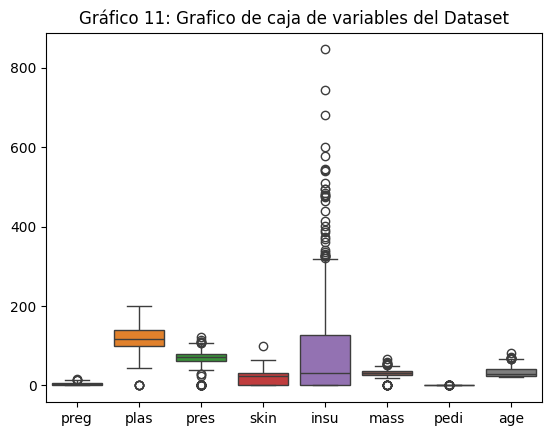

In [26]:
sns.boxplot(data)
plt.title('Gráfico 11: Grafico de caja de variables del Dataset')

El siguiente grafico representa la distribucion de datos de las variables

Text(0.5, 1.0, 'Gráfico 12: Grafico de violin de variables del dataset')

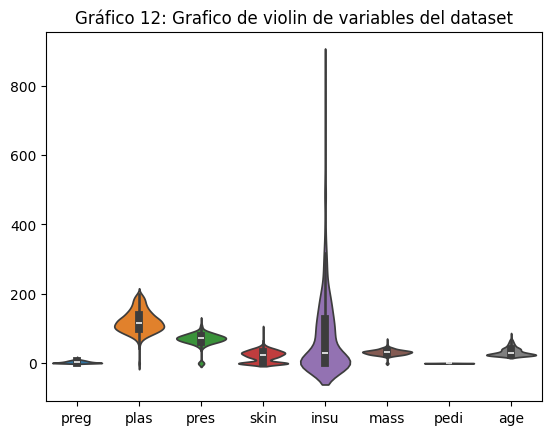

In [27]:
sns.violinplot(data)
plt.title('Gráfico 12: Grafico de violin de variables del dataset')

Dado que en la seccion 2, analizamos que ciertas variables tienen demasiados datos invalidos, tambien por la existencia de datos muy dispersos entre el tercer y cuarto cuartil, eliminaremos la que tienen muchos datos con valor 0, las cuales eran : '**skin**' e '**insu**'

In [28]:
data_2 = data_1.drop(['skin', 'insu'], axis = 1);data_2

,preg,plas,pres,mass,pedi,age,tested_positive
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


Prodecemos a crear un grafico de calor que represente la correlacion de las variables del dataset.


Text(0.5, 1.0, 'Gráfico 13: Mapa de calor Correlacion Variables')

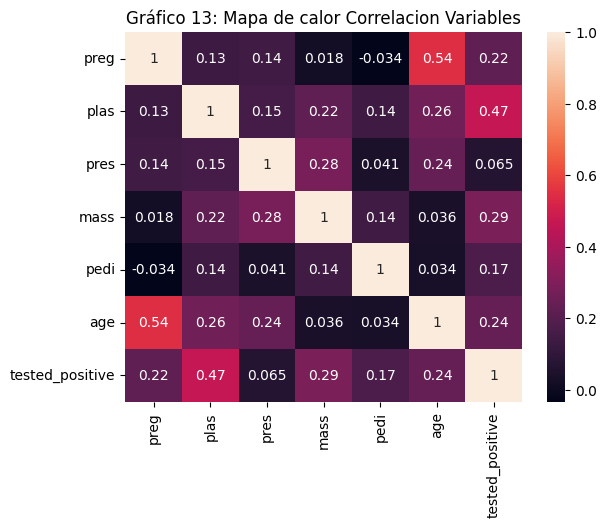

In [29]:
sns.heatmap(data_2.corr(), annot = True)
plt.title('Gráfico 13: Mapa de calor Correlacion Variables')

Dado que no se ven altas correlaciones (cercano a 1) cruzadas entre las variables explicativas. Escogemos las que tengan mayor correlacion con la variable a explicar, en este caso son '**plas**', '**mass**' y '**age**'. Creamos un dataset con las variables explicativas seleccionadas mas la variable a explicar.

In [30]:
data_3 = data_2[['tested_positive', 'plas', 'mass', 'age']];data_3

,tested_positive,plas,mass,age
0,1,148,33.6,50
1,0,85,26.6,31
2,1,183,23.3,32
3,0,89,28.1,21
4,1,137,43.1,33
...,...,...,...,...
763,0,101,32.9,63
764,0,122,36.8,27
765,0,121,26.2,30
766,1,126,30.1,47


### **Arreglando los valores invalidos**

Text(0, 0.5, 'cantidad')

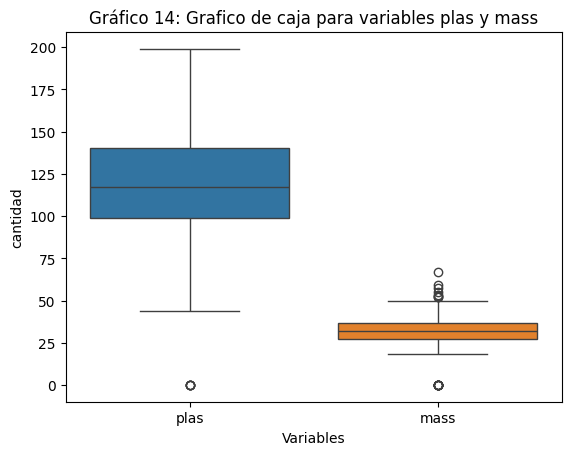

In [31]:
sns.boxplot(data_3[['plas', 'mass']])
plt.title('Gráfico 14: Grafico de caja para variables plas y mass')
plt.xlabel('Variables')
plt.ylabel('cantidad')

Para el caso de la variable 'plas' y 'mass', eliminaremos los valores con 'cero', ya que al ver la dispersion de datos en el grafico de caja, la media y mediana estan sesgados por los valores que se encuentran alejados de la concentracion

In [32]:
data_4 = data_3.drop(index = data_3[(data_1[['plas', 'mass']] == 0).any(axis = 1)].index);data_4

,tested_positive,plas,mass,age
0,1,148,33.6,50
1,0,85,26.6,31
2,1,183,23.3,32
3,0,89,28.1,21
4,1,137,43.1,33
...,...,...,...,...
763,0,101,32.9,63
764,0,122,36.8,27
765,0,121,26.2,30
766,1,126,30.1,47


Text(0, 0.5, 'cantidad')

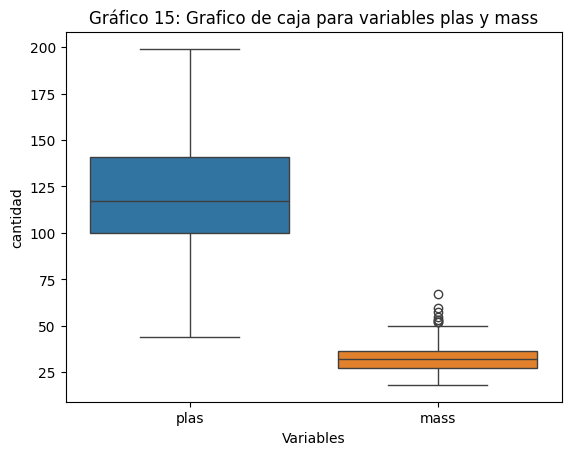

In [33]:
sns.boxplot(data_4[['plas', 'mass']])
plt.title('Gráfico 15: Grafico de caja para variables plas y mass')
plt.xlabel('Variables')
plt.ylabel('cantidad')

## *Preparacion para construccion del modelo*

### **Definicion de variables explicativas y a explicar**

In [34]:
X = data_4[['plas', 'mass', 'age']]
y = data_4['tested_positive']

### **Generación de sets de entrenamiento y test**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

### **Reescalado de Variables**

In [36]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [37]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
pd.DataFrame(X_train_scaled, columns = X_train.columns)

,plas,mass,age
0,0.083916,0.419903,0.509804
1,0.538462,0.356796,0.352941
2,0.510490,0.237864,0.117647
3,0.195804,0.461165,0.137255
4,0.321678,0.305825,0.098039
...,...,...,...
521,0.531469,0.393204,0.450980
522,0.118881,0.116505,0.000000
523,0.979021,0.444175,0.156863
524,0.566434,0.742718,0.313725


# ***Sección 4***

## *Modelado*

### **Entrenamiento del modelo**

In [39]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

### **Prediccion del modelo**

In [40]:
predicciones = log_model.predict(X_test_scaled);predicciones

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1])

### **Valores reales vs Predicciones**

In [41]:
pd.DataFrame({'Valor Real': y_test.values,
              'Predicciones': predicciones})

,Valor Real,Predicciones
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
221,0,0
222,1,0
223,0,0
224,0,0


## *Evaluación*

In [42]:
probabilidades = log_model.predict_proba(X_test_scaled)[:,1]

### **Reporte de clasificación**

In [43]:
umbrales = [0.3, 0.5, 0.7]
for umbral in umbrales:
  predicciones = (probabilidades >= umbral).astype(int)
  print(f"Reporte de clasificacion para umbral {umbral}:")
  print(classification_report(y_test, predicciones))

Reporte de clasificacion para umbral 0.3:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       154
           1       0.53      0.83      0.65        72

    accuracy                           0.71       226
   macro avg       0.71      0.74      0.70       226
weighted avg       0.78      0.71      0.72       226

Reporte de clasificacion para umbral 0.5:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       154
           1       0.69      0.67      0.68        72

    accuracy                           0.80       226
   macro avg       0.77      0.76      0.76       226
weighted avg       0.80      0.80      0.80       226

Reporte de clasificacion para umbral 0.7:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85       154
           1       0.79      0.36      0.50        72

    accuracy                           0.77       226
  

Se utilizaron 3 umbrales distintos para evaluar nuestro modelo de regresión logística, siendo de 0.3, 0.5 y 0.7 respectivamente, con los cuales se pudo concluir que la sensibilidad (recall)  fue de 83% para el umbral 0.3, 67% para el umbral 0.5 y 36% para el umbral 0.7, esta disminución en el porcentaje se explica por el umbral, puesto que la sensibilidad indica cuantos resultados de la clase 1 fueron correctamente reconocidos, por lo tanto, al empezar con un punto de operación pequeño aumenta la posibilidad de acertar en que el resultado de la clase sea 1, al ir incrementando los puntos de operación fue disminuyendo el porcentaje de los casos que fueron reconocidos correctamente por el modelo, por lo que a un punto de operación más bajo se obtuvo una mejor detección de casos correctamente reconocidos y con un umbral mas alto se obtuvo una peor detección de casos correctamente reconocidos.
En el reporte de clasificación obtuvimos que el Accuracy arrojó que dentro del umbral 0.3 el modelo ha arrojado una precisión del 71%, es decir, el modelo ha clasificado correctamente el 71% de los datos. Para el umbral 0.5 el modelo aumenta su precisión a un 80%, es decir, el modelo ha clasificado correctamente el 80% de los datos. Por último, en el umbral de 0.7 tenemos que el modelo tiene una precisión del 77%, por lo tanto, el modelo a clasificado de manera correcta el 77% de los datos.
En el reporte de clasificación se obtuvo que la precisión fue de 53% para el umbral 0.3, 69% para el umbral 0.5 y 79% para el umbral 0.7, esto nos indica que a un mayor punto de operación se obtiene una mejor precisión ya que al aumentar el umbral hay una mayor rigurosidad para clasificar cuales datos son realmente verdaderos positivos, es por esto por lo que también al tener un menor umbral se obtiene una precisión menor.
Nosotros creemos que el mejor punto de operación es el 0.5 ya que con este umbral se obtuvo la mejor precisión tanto de verdaderos positivos como de verdaderos negativos, pues acertó en el 80% de los casos, además tiene una sensibilidad media alta debido a que acertó un 67% de verdaderos positivos, por parte de la precisión se obtuvo que fue media alta, ya que nos indicó que acertó en un 69% los verdaderos positivos que si fueron verdaderos positivos. En conclusión nosotros identificamos que en este umbral se presenta un buen equilibrio entre los verdaderos positivos y se minimizan más los falsos negativos. Es menos grave darle un diagnóstico positivo de diabetes a una persona sana que darle un diagnóstico de no diabetes a una persona que si tiene ya que esto podría significar un agravamiento en su salud si no adquiere un tratamiento a tiempo.


### **Matriz de confusión**

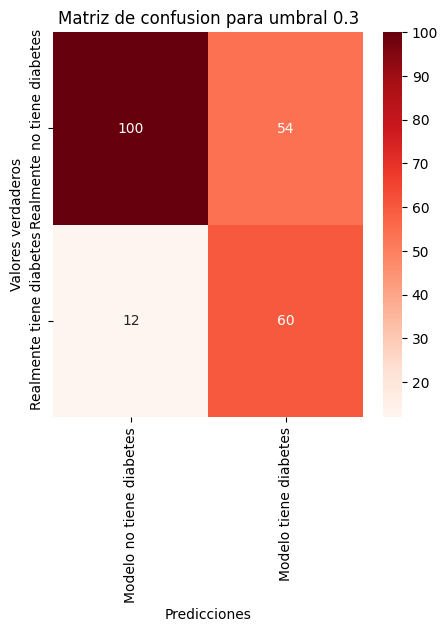

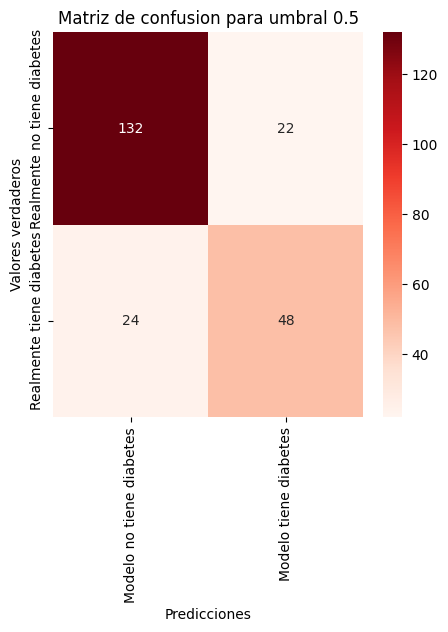

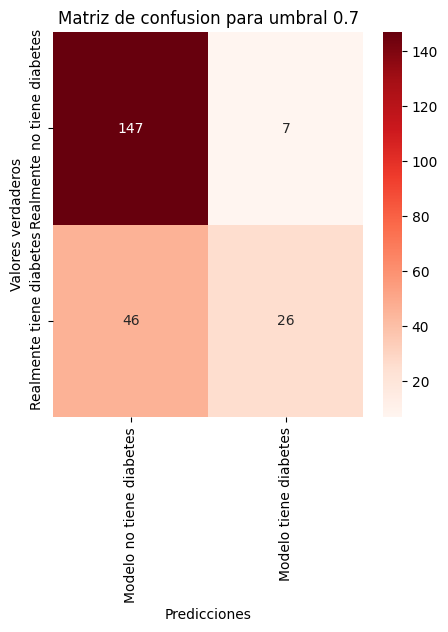

In [44]:
umbrales = [0.3, 0.5, 0.7]
for umbral in umbrales:
  predicciones = (probabilidades >= umbral).astype(int)

  cm = confusion_matrix(y_test, predicciones)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot = True, cmap = "Reds", fmt = "g", yticklabels=["Realmente no tiene diabetes" , "Realmente tiene diabetes"] , xticklabels=["Modelo no tiene diabetes" , "Modelo tiene diabetes"])
  plt.title(f"Matriz de confusion para umbral {umbral}")
  plt.xlabel("Predicciones")
  plt.ylabel("Valores verdaderos")

Para la matriz de confusión en el umbral de 0.3 tenemos que hay 60 verdaderos positivos, 54 falsos positivos, 12 falsos negativos y 100 verdaderos negativos. En el umbral de 0.5 tenemos 48 verdaderos positivos, 22 falsos positivo, 24 falso negativos y 132 verdaderos negativos. Por último, encontramos 26 verdaderos positivos, 7 falsos positivos, 49 falsos negativos y 147 verdaderos negativos.
Se puede observar la relación de que mientras más bajo es el punto de operación más altos son los verdaderos positivos y los verdaderos negativos. En cambio a un mayor punto de operación hay mayores verdaderos negativos y falsos negativos.
